## Create circles

Just proof of concept that we can create fictional experimental data (circles)
and by using mask we can plot them into distance-value figure. Values are preserved.

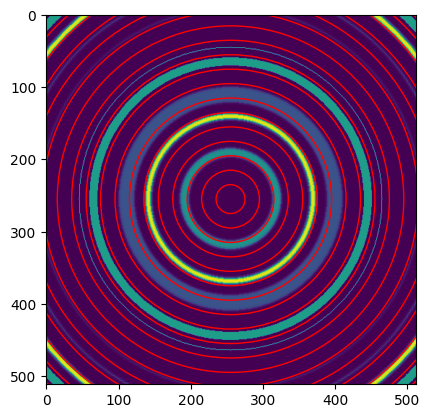

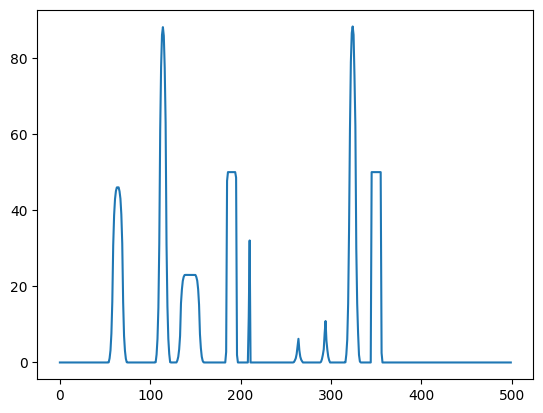

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import cv2
from scipy import optimize
import ellipse as el

# Create fictional experimental data
empty = np.zeros([512,512])
data = empty.copy()
R = [60,61,62,63,64,65,66,67,68]
V = [1,2,4,8,16,8,4,2,1]
cv2.circle(data,(255,255),190,50,10)
cv2.circle(data,(255,255),210,50,1)
cv2.circle(data,(255,255),350,50,10)
for r,v in zip(R,V):
    temp = empty.copy()
    cv2.circle(temp,(255,255),r,v,10)
    cv2.circle(temp,(255,255),r+50,v*2,5)
    cv2.circle(temp,(255,255),r+80,v/2,20)
    cv2.circle(temp,(255,255),r+200,v/2,1)
    cv2.circle(temp,(255,255),r+230,v,1)
    cv2.circle(temp,(255,255),r+260,v*2,5)
    data += temp

fig,ax = plt.subplots()
ax.imshow(data,vmin=0,vmax=90)

radii = np.arange(0,500,1)
circle_sums = np.zeros(500)
for i,r in enumerate(radii):
    cx = 255
    cy = 255
    circle_sums[i] = el.mask_sum(data,cx,cy,r,1,0)
    if (i%20==0):
        ax.add_patch(patches.Circle((cx,cy),r,color='red',fill=False))
plt.show()

plt.plot(radii,circle_sums)
plt.show()

## Ellipse fitting using SVD

Parameters of best-fitting ellipse in the mean of *sum of squares* can be found
using **SVD** (Singular Value Decomposition) method as described [here](https://scipython.com/blog/direct-linear-least-squares-fitting-of-an-ellipse).

Exact parameters:
x0, y0, ap, bp, phi = 100 100 80 40 1.0471975511965976
Fitted parameters:
a, b, c, d, e, f = [ 5.58724352e-01 -6.62559020e-01  4.98841301e-01 -2.97024119e+01
 -6.02306682e+01  4.83193765e+03]
x0, y0, ap, bp, phi =  102.88882605885173 128.6988342346621 53.99583494204045 25.766302481749186 0.8304664410499466


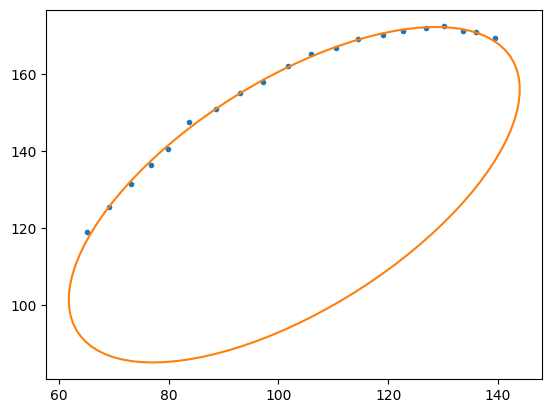

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ellipse as el

# Get some points on the ellipse (no need to specify the eccentricity).
npts = 20
x0, y0, a, b, phi = (100,100,80,40,np.pi/3)
x, y = el.get_ellipse_pts((x0, y0, a, b, phi), npts, 0, np.pi/2)
noise = 0.5
x += noise * np.random.normal(size=npts) 
y += noise * np.random.normal(size=npts)

coeffs = el.fit_ellipse(x, y)
print('Exact parameters:')
print('x0, y0, ap, bp, phi =', x0, y0, a, b, phi)
print('Fitted parameters:')
print('a, b, c, d, e, f =', coeffs)
x0, y0, ap, bp, phi = el.cart_to_pol(coeffs)
print('x0, y0, ap, bp, phi = ', x0, y0, ap, bp, phi)

plt.plot(x, y, '.')     # given points
x, y = el.get_ellipse_pts((x0, y0, ap, bp, phi))
plt.plot(x, y)
ax = plt.gca()
plt.show()

## Ellipse fitting using scipy

Ellipse parameters can be found also by using `scipy.optimize.minimize` function.

Exact parameters:
x0, y0, ap, bp, phi = 100 100 80 40 1.0471975511965976
Fit parameters: [100.2582832   99.98462662  79.89506442  40.12150076   1.05041376]


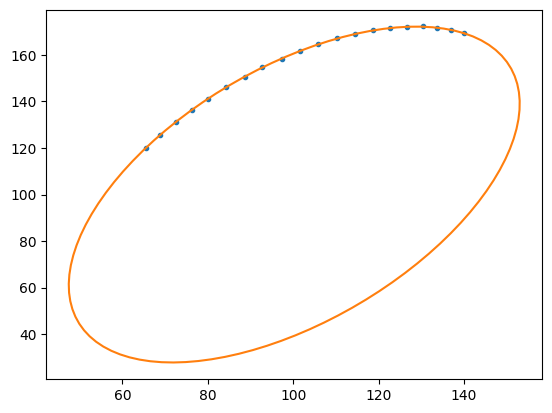

In [26]:
import ellipse as el

def objective(p:list,x:np.ndarray,y:np.ndarray) -> float:
        return el.get_sum_of_squares(x,y,p)

npts = 20
x0, y0, a, b, phi = (100,100,80,40,np.pi/3)
x, y = el.get_ellipse_pts((x0, y0, a, b, phi), npts, 0, np.pi/2)
noise = 0.1
x += noise * np.random.normal(size=npts) 
y += noise * np.random.normal(size=npts)

ansatz = [100,100,80,40,0]
bounds = ((None,None),(None,None),(0.1,None),(0.1,None),(0,2*np.pi))
res = optimize.minimize(objective,ansatz,args=(x,y),bounds=bounds)
print('Exact parameters:')
print('x0, y0, ap, bp, phi =', x0, y0, a, b, phi)
print("Fit parameters:",res.x)

plt.plot(x, y, '.')
x, y = el.get_ellipse_pts(res.x)
plt.plot(x, y)
ax = plt.gca()
plt.show()